In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [360]:
df = pd.read_excel('https://data.parliament.uk/resources/constituencystatistics/Ethnic-group.xlsx', sheet_name='Constituency data')
df.head(5)

,ONSConstID,ConstituencyName,RegionID,RegionName,CountryID,CountryName,DateThisUpdate,DateOfDataset,PopTotalConstNum,PopWhiteConstNum,...,PopMixedUKNum,PopAsianUKNum,PopBlackUKNum,PopOtherUKNum,PopTotalUK%,PopWhiteUK%,PopMixedUK%,PopAsianUK%,PopBlackUK%,PopOtherUK%
0,E14000554,Berwick-upon-Tweed,E12000001,North East,K02000001,United Kingdom,2018-05-08,2011,75718,74698,...,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
1,E14000569,Bishop Auckland,E12000001,North East,K02000002,United Kingdom,2018-05-08,2011,87143,86058,...,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
2,E14000574,Blaydon,E12000001,North East,K02000003,United Kingdom,2018-05-08,2011,88281,86692,...,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
3,E14000575,Blyth Valley,E12000001,North East,K02000004,United Kingdom,2018-05-08,2011,82174,81071,...,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186
4,E14000641,City of Durham,E12000001,North East,K02000005,United Kingdom,2018-05-08,2011,94375,90135,...,1250229,4373339,1904684,580374,1,0.871663,0.019788,0.069218,0.030146,0.009186


In [357]:
columnsArray = ['Race', 'Population', 'Actual Representation Total']
totals = pd.DataFrame(columns = columnsArray)
totals = totals.append(pd.DataFrame([['Total', sum(df['PopTotalConstNum']), sum(df['PopTotalConst%'])]], columns = columnsArray))
totals = totals.append(pd.DataFrame([['White', sum(df['PopWhiteConstNum']), sum(df['PopWhiteConst%'])]], columns = columnsArray))
totals = totals.append(pd.DataFrame([['Mixed', sum(df['PopMixedConstNum']), sum(df['PopMixedConst%'])]], columns = columnsArray))
totals = totals.append(pd.DataFrame([['Asian', sum(df['PopAsianConstNum']), sum(df['PopAsianConst%'])]], columns = columnsArray))
totals = totals.append(pd.DataFrame([['Black', sum(df['PopBlackConstNum']), sum(df['PopBlackConst%'])]], columns = columnsArray))
totals = totals.append(pd.DataFrame([['Other', sum(df['PopOtherConstNum']), sum(df['PopOtherConst%'])]], columns = columnsArray))

Text(0, 0.5, 'Total Population (Less Power ->)')

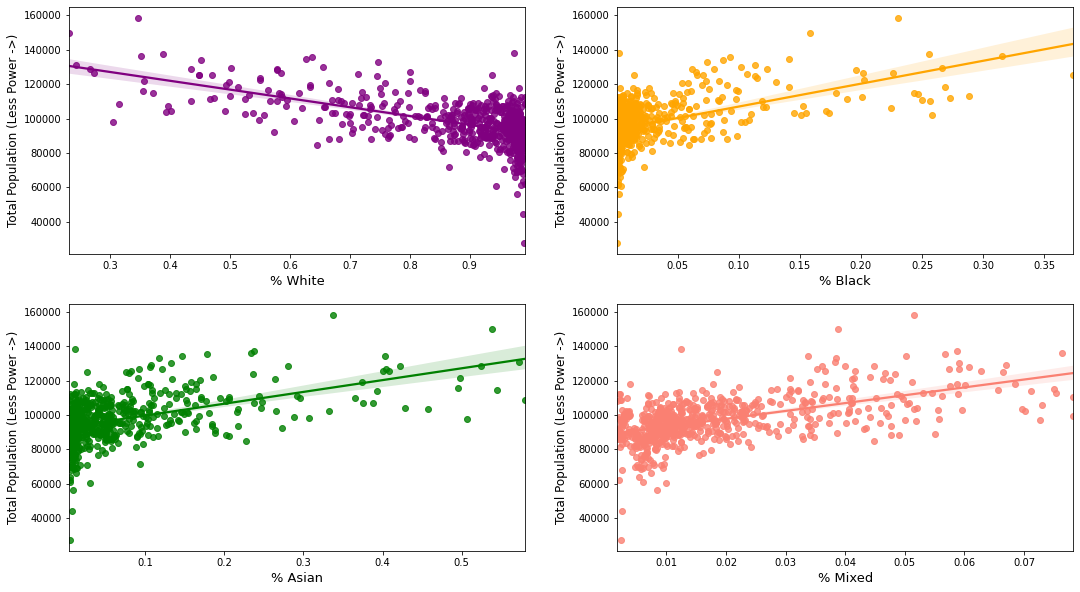

In [354]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.regplot(ax=axes[0, 0], data=df, y="PopTotalConstNum", x="PopWhiteConst%", color='purple')
sns.regplot(ax=axes[0, 1], data=df, y="PopTotalConstNum", x="PopBlackConst%", color='orange')
sns.regplot(ax=axes[1, 0], data=df, y="PopTotalConstNum", x="PopAsianConst%", color='green')
sns.regplot(ax=axes[1, 1], data=df, y="PopTotalConstNum", x="PopMixedConst%", color='salmon')

axes[0][0].set_xlabel('% White', fontsize=13)
axes[0][0].set_ylabel('Total Population (Less Power ->)', fontsize=12)
axes[0][1].set_xlabel('% Black', fontsize=13)
axes[0][1].set_ylabel('Total Population (Less Power ->)', fontsize=12)
axes[1][0].set_xlabel('% Asian', fontsize=13)
axes[1][0].set_ylabel('Total Population (Less Power ->)', fontsize=12)
axes[1][1].set_xlabel('% Mixed', fontsize=13)
axes[1][1].set_ylabel('Total Population (Less Power ->)', fontsize=12)

In [358]:
populationTotal = totals.iloc[0, 1]
mpTotal = totals.iloc[0, 2]

totals['PopulationProp'] = totals['Population'] / populationTotal
totals['MPProp'] = totals['Actual Representation Total'] / mpTotal
totals['Deserved Representation Total'] = totals['PopulationProp'] * 650
totals['Representation gain (MPs)'] = totals['Actual Representation Total'] - totals['Deserved Representation Total']
totals['Representation gain %'] = totals['Representation gain (MPs)'] / totals['Actual Representation Total']
totals

,Race,Population,Actual Representation Total,PopulationProp,MPProp,Deserved Representation Total,Representation gain (MPs),Representation gain %
0,Total,63182178,650,1,1,650,0,0
0,White,55073552,574.083,0.871663,0.883205,566.581,7.50242,0.0130685
0,Mixed,1250229,12.0978,0.0197877,0.018612,12.862,-0.7642,-0.0631686
0,Asian,4373339,41.0862,0.0692179,0.0632095,44.9916,-3.90549,-0.0950561
0,Black,1904684,17.3319,0.0301459,0.0266644,19.5948,-2.26298,-0.130567
0,Other,580374,5.40096,0.00918572,0.00830917,5.97072,-0.569759,-0.105492


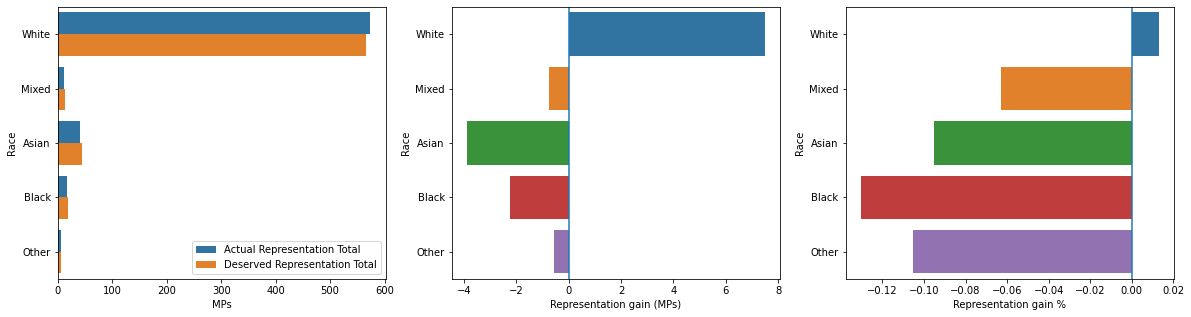

In [359]:
totalsTotalRemoved = totals[totals["Race"] != 'Total']
graphTable = pd.melt(totalsTotalRemoved, id_vars=['Race'], value_vars=['Actual Representation Total', 'Deserved Representation Total'], ignore_index=False)
graphTable.columns = ['Race', 'Type', 'MPs']
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(ax=axes[0], y="Race", x="MPs", hue="Type", data=graphTable)
sns.barplot(ax=axes[1], y="Race", x="Representation gain (MPs)", data=totalsTotalRemoved)
sns.barplot(ax=axes[2], y="Race", x="Representation gain %", data=totalsTotalRemoved)
axes[0].legend(loc = 4)
axes[1].axvline(0, ls='-')
axes[2].axvline(0, ls='-')